In [10]:
%load_ext autoreload
%autoreload 2

import numpy as np
from numpy import genfromtxt
from trueskill import TrueSkill, Rating, quality_1vs1, rate_1vs1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from matplotlib import cm
from scipy import stats
import operator as op
import pandas as pd
from ast import literal_eval
from mpl_toolkits.mplot3d import Axes3D
import math
import sys
from random import shuffle
from scipy.spatial import distance

import mygabasic as ga
 
%aimport mygabasic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# SPH-m (Schaffer 1985; Laumanns, Rudolph, and Schwefel 2001)

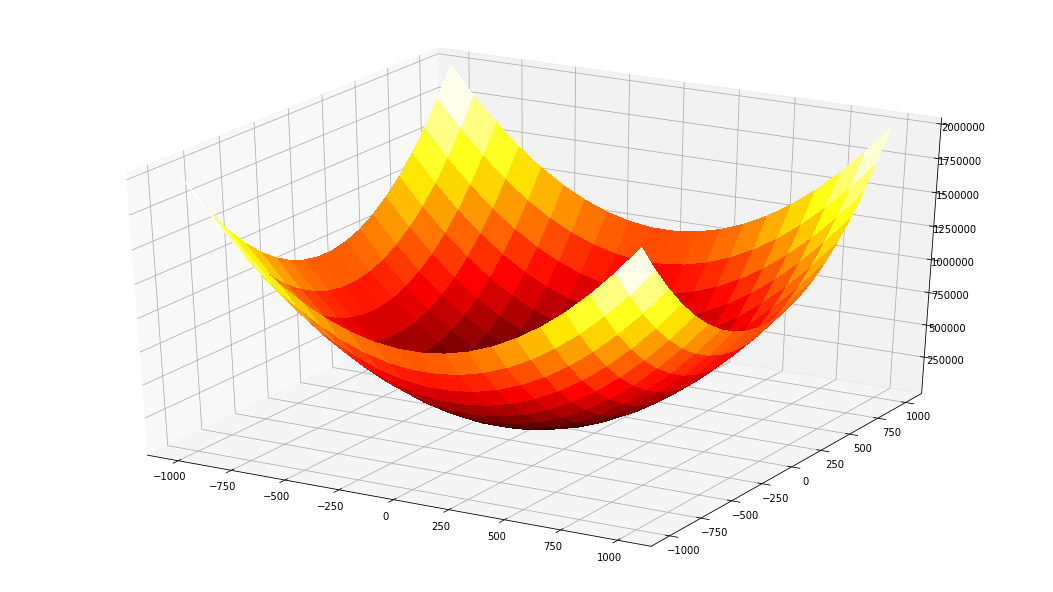

In [2]:
def SPH2_f1(*X, **kwargs):
   
    
    return (X[1])**2 + (X[0]-1)**2


X = np.linspace(-1000, 1000, 20)    
Y = np.linspace(-1000, 1000, 20)    

X, Y = np.meshgrid(X, Y)

Z1 = SPH2_f1(X, Y)


fig = plt.figure()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=False)    


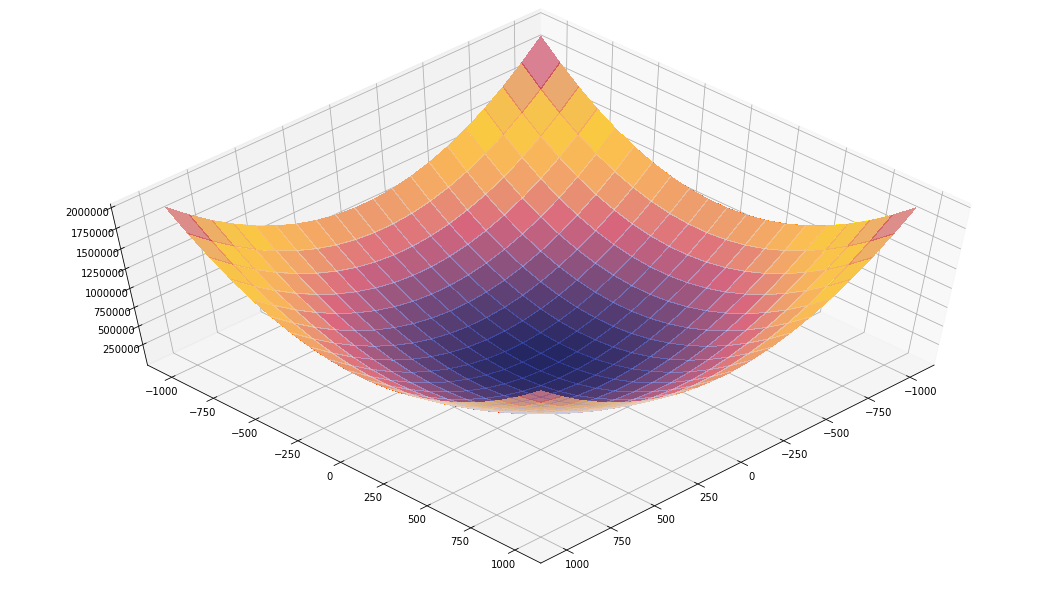

In [3]:
def SPH2_f2(*X, **kwargs):
   
    
    return (X[0])**2 + (X[1]-1)**2



Z2 = SPH2_f2(X, Y)


fig = plt.figure()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
ax = fig.gca(projection='3d')
ax.view_init(60, 45)
ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=False, alpha=1) 
ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.5) 
# ax.scatter(X, Y, Z2)
plt.show()

In [11]:
# Dominance workout for all minimizing
def dominance4AllMinTwoFunctions(fitListF1,fitListF2, prevFront = None):
    front = []
    if prevFront == None:
        for p in range(len(fitListF1)):
            np = 0
            for q in range(len(fitListF1)):
                if (fitListF1[q] <= fitListF1[p] and fitListF2[q] <= fitListF2[p]) and (fitListF1[q] < fitListF1[p] or fitListF2[q] < fitListF2[p]):
                    np = 1
                    break
            if np == 0:
                front.append(p)
    else:
        for p in range(len(fitListF1)): 
            np = 0
            if p not in prevFront:
                for q in range(len(fitListF1)):
                    if q not in prevFront:
                        if (fitListF1[q] <= fitListF1[p] and fitListF2[q] <= fitListF2[p]) and (fitListF1[q] < fitListF1[p] or fitListF2[q] < fitListF2[p]):
                            np = 1
                            break
            else:
                np = 1
            if np == 0:
                front.append(p)
    return  front  
    

# SPH-2

In [5]:
def SPH1_100_f1(fevalMtx):
    sumi = sum([x[0]**2 for x in fevalMtx])
    sumi = sumi - (fevalMtx[0][0])**2
    sumi = sumi + (fevalMtx[0][0] - 1)**2
    return sumi 

def SPH1_100_f2(fevalMtx):
    sumi = sum([x[0]**2 for x in fevalMtx])
    sumi = sumi - (fevalMtx[1][0])**2
    sumi = sumi + (fevalMtx[1][0] - 1)**2
    return sumi 

def SPH1_100_f1BinString(binString):
    codeLen = 16 
    cromoSize = binString.shape[0]
    col = int(cromoSize/codeLen)
    splitPop = binString.reshape((col,codeLen))
    # print(splitPop)
    fevalMtx = [[ga.gdeco(bitlist = dim, minVal = -1000, maxVal = 1000, codeLen = codeLen)] for dim in splitPop]
    # print(fevalMtx)
    rval =  SPH1_100_f1(np.asarray(fevalMtx))
    # print(rval)
    return rval

def SPH1_100_f2BinString(binString):
    codeLen = 16 
    cromoSize = binString.shape[0]
    col = int(cromoSize/codeLen)
    splitPop = binString.reshape((col,codeLen))
    # print(splitPop)
    fevalMtx = [[ga.gdeco(bitlist = dim, minVal = -1000, maxVal = 1000, codeLen = codeLen)] for dim in splitPop]
    # print(fevalMtx)
    rval =  SPH1_100_f2(np.asarray(fevalMtx))
    # print(rval)
    return rval

# ZDT6

In [6]:
def ZDT6_100_f1(fevalMtx):
    pre1 = 1 - np.exp(-4*fevalMtx[0][0])*np.power(np.sin(6*np.pi*fevalMtx[0][0]), 6) 
    return pre1
    
def ZDT6_100_g(fevalMtx):
    sumi = sum([x[0] for x in fevalMtx])
    sumi = sumi - (fevalMtx[0][0])
    sumi = sumi/99
    sumi = 1 + 9*np.power(sumi,0.25)
    return sumi

def ZDT6_100_f2(fevalMtx):
    pre1 = ZDT6_100_g(fevalMtx)*(1-np.power((ZDT6_100_f1(fevalMtx)/ZDT6_100_g(fevalMtx)),2))
    return pre1

# KUR

In [7]:
def KUR_100_f2(fevalMtx):
    sumi = sum([(np.power(np.absolute(x[0]),0.8) + 5*np.power(np.sin(x[0]),3)) for x in fevalMtx])
    return sumi
    
def KUR_100_f1(fevalMtx):
    # To skip the first element
    # for car in cars[1:]:
    
    # to skip the last elem
    # for car in cars[:-1]:
    
    # for x,xp in zip(fevalMtx[:-1], fevalMtx[1:])
    sumi = sum([ -10*np.exp(-0.2*np.sqrt(x[0]**2 + xp[0]**2)) for x,xp in zip(fevalMtx[:-1], fevalMtx[1:])])
    return sumi

In [8]:
def frontSetBuilder(fitListF1,fitListF2,Pop):
    # list of indexed fronts. Each item holds a list of individual indexes belonging to a front
    # in a ascending front rank. Each index identify each individual into the population
    # arragement.
    frontLit = []
    # first front workout
    front = dominance4AllMinTwoFunctions(fitListF1,fitListF2)
    fontprev = front.copy()
    # subsequent nondominated fronts
    while len(front) > 0:
        frontLit.append(front)
        front = dominance4AllMinTwoFunctions(fitListF1,fitListF2,fontprev)
        fontprev = fontprev + front
    

    """
    The crowding-distance computation requires sorting the population
    according to each objective function value in ascending
    order of magnitude
    """
    fronRanks = []
    global_fronRanks = []
    for j in range(len(frontLit)):
        # F1
        frotnFitListF1 = [fitListF1[i] for i in frontLit[j]]
        # distance array. Implicit initial order math with f1 rank order
        # for first funtion reordering distance array is not required!!!
        distance = np.zeros(len(frotnFitListF1))
        distance[0] = np.inf
        distance[len(frotnFitListF1) - 1] = np.inf
        # f1 sorting
        frotnFitListF1_SortedIdxs = np.argsort(frotnFitListF1)
        frotnFitListF1np = np.asarray(frotnFitListF1)[frotnFitListF1_SortedIdxs]

        f1Min = np.amin(frotnFitListF1) 
        f1Max = np.amax(frotnFitListF1) 
        # f1 component
        if len(frotnFitListF1) == 3:
            distance[1] = distance[1] + (frotnFitListF1np[2] - frotnFitListF1np[0])/(f1Max-f1Min)
        elif len(frotnFitListF1) > 3:
            for w in range(1,(len(frotnFitListF1) - 1)):
                distance[w] = distance[w] + (frotnFitListF1np[w + 1] - frotnFitListF1np[w - 1])/(f1Max-f1Min)
        """
        print(frotnFitListF1)
        print(frotnFitListF1_SortedIdxs)
        print(frotnFitListF1np)
        print(distance)
        """
    
    
        # reorder distance to match initial individual "position" into pop.
        np.put(distance, frotnFitListF1_SortedIdxs, distance.copy())
        # print(distance)

        # F2
        frotnFitListF2 = [fitListF2[i] for i in frontLit[j]]
        # f2 sorting
        frotnFitListF2_SortedIdxs = np.argsort(frotnFitListF2)
        frotnFitListF2np = np.asarray(frotnFitListF2)[frotnFitListF2_SortedIdxs]

        # pop sorting
        # this is done for last function
        # raked individuals into a front
        # are returned ordered accoriding to last function evaluation
        frontValList = [Pop[i] for i in frontLit[j]]
        frontValListnp = np.asarray(frontValList)[frotnFitListF2_SortedIdxs]
        # reorder distance array!!!
        distance = distance[frotnFitListF2_SortedIdxs]

        f2Min = np.amin(frotnFitListF2)
        f2Max = np.amax(frotnFitListF2)
        # f2 component
        if len(frotnFitListF2) == 3:
            distance[1] = distance[1] + (frotnFitListF2np[2] - frotnFitListF2np[0])/(f2Max-f2Min)
        elif len(frotnFitListF2) > 3:
            for w in range(1,(len(frotnFitListF2) - 1)):
                distance[w] = distance[w] + (frotnFitListF2np[w + 1] - frotnFitListF2np[w - 1])/(f2Max-f2Min)

        """
        print(frotnFitListF2)
        print(frotnFitListF2_SortedIdxs)
        print(frotnFitListF2np)
        print(distance)
        """
   
        rankedFront = []  
        for w in range(len(frotnFitListF1)):
            rankedFront.append({'rank':distance[w],'indiv':frontValListnp[w],'front':j})
            global_fronRanks.append({'rank':distance[w],'indiv':frontValListnp[w],'front':j})

        fronRanks.append(rankedFront)
    return global_fronRanks,fronRanks,frontLit

# NSGA-2

 Iteration 0

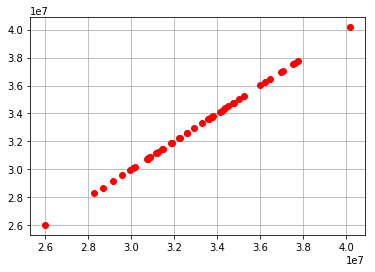

 Iteration 2

/Users/SerG1oAC/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
/Users/SerG1oAC/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in double_scalars
/Users/SerG1oAC/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars
/Users/SerG1oAC/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in double_scalars


 Iteration 1200

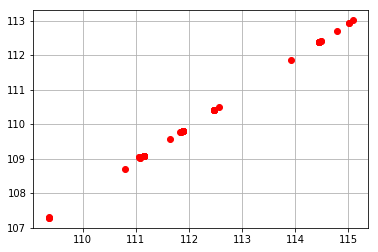

 Iteration 2400

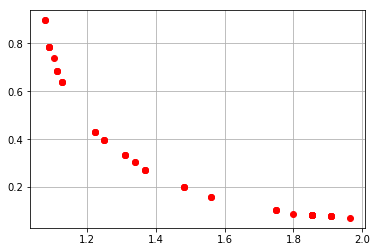

 Iteration 3600

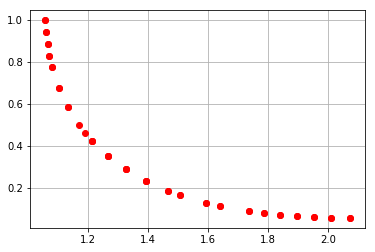

 Iteration 4800

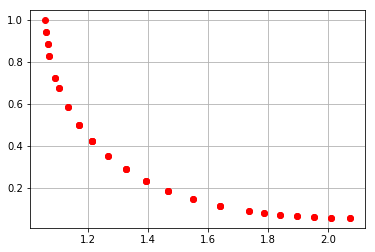

 Iteration 6000

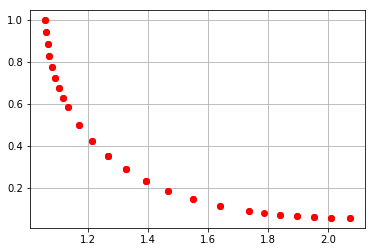

 Iteration 6199

In [35]:
N = 50
minVal = -1000
maxVal = 1000
codeLen = 16
genQty = 100
d = codeLen * genQty
iterations = 6200
matingPercent = 0.7
mutaPercent = 1/d
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []
for t in range(iterations):
    sys.stdout.write("\r Iteration " + str(t))
    sys.stdout.flush()
    # Population fitnes and real values
    fitListF1,fitValF1 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = SPH1_100_f1)
    fitListF2,fitValF2 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = SPH1_100_f2)
    if t%1200 == 0:
        plt.plot(fitListF1, fitListF2, 'ro')
        plt.grid()
        plt.savefig('multiObjSPH2_' + str(t) + '.pdf', format='pdf')
        plt.show()
    
    global_fronRanks,fronRanks,frontLit = frontSetBuilder(fitListF1,fitListF2,Pop)
    shuffle(global_fronRanks)
    selection = ga.tournamentSelection4MultyObjMin(Pop, global_fronRanks)
    children = ga.childenGen4MultyObjMin(Pop, selection, matingPercent, mutaPercent)

    augmentedPop = np.concatenate((Pop, children), axis=0)

    # Population fitnes and real values
    fitListF1,fitValF1 = ga.popfitnes(pop = augmentedPop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = SPH1_100_f1)
    fitListF2,fitValF2 = ga.popfitnes(pop = augmentedPop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = SPH1_100_f2)
    global_fronRanks,fronRanks,frontLit = frontSetBuilder(fitListF1,fitListF2,augmentedPop)


    newPop = np.zeros(Pop.shape).astype(np.uint8)
    popIndex = 0
    for i in range(len(fronRanks)):
        orderedFront = sorted(fronRanks[i], key=lambda k: k['rank'], reverse=True) 
        for j in range(len(orderedFront)):
            newPop[popIndex] = orderedFront[j]['indiv']
            popIndex = popIndex + 1
            if popIndex == Pop.shape[0]:
                break
        if popIndex == Pop.shape[0]:
                break
    
    Pop = np.copy(newPop)
    
    
# Population fitnes and real values
fitListF1,fitValF1 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = SPH1_100_f1)
fitListF2,fitValF2 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = SPH1_100_f2)

global_fronRanks,fronRanks,frontLit = frontSetBuilder(fitListF1,fitListF2,Pop)

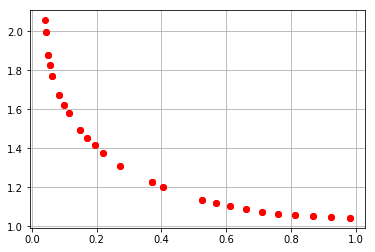

In [9]:
plt.plot(fitListF1, fitListF2, 'ro')
plt.grid()
plt.show()

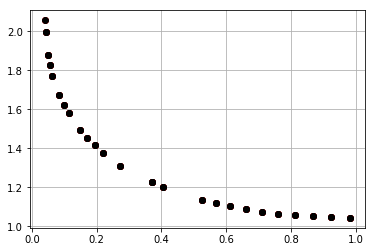

In [10]:
frotnListF1 = [fitListF1[i] for i in frontLit[0]]
frotnListF2 = [fitListF2[i] for i in frontLit[0]]

frotn4ListF1 = [fitListF1[i] for i in frontLit[len(fronRanks)-1]]
frotn4ListF2 = [fitListF2[i] for i in frontLit[len(fronRanks)-1]]
plt.plot(frotnListF1, frotnListF2, 'ro',frotn4ListF1,frotn4ListF2,'ko')
plt.grid()
plt.show()

 Iteration 0

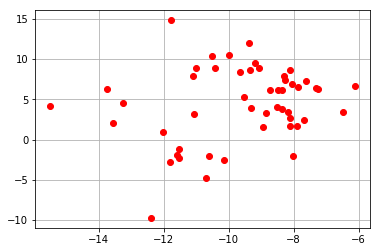

 Iteration 30

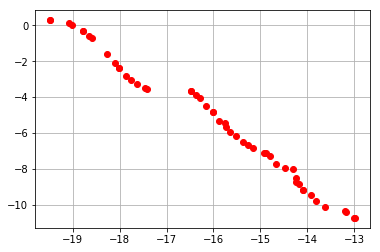

 Iteration 60

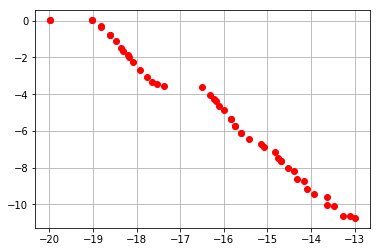

 Iteration 90

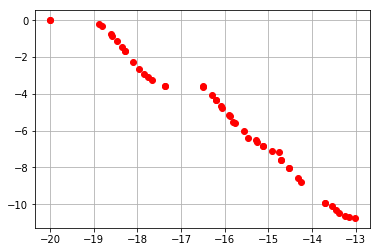

 Iteration 120

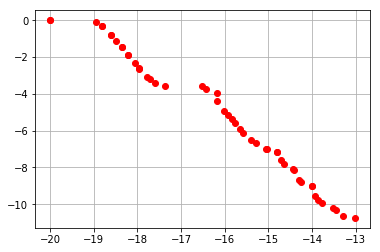

 Iteration 149

In [37]:
N = 50
minVal = -5
maxVal = 5
codeLen = 16
genQty = 3
d = codeLen * genQty
iterations = 150
matingPercent = 0.7
mutaPercent = 1/d
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []
for t in range(iterations):
    sys.stdout.write("\r Iteration " + str(t))
    sys.stdout.flush()
    # Population fitnes and real values
    fitListF1,fitValF1 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = KUR_100_f1)
    fitListF2,fitValF2 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = KUR_100_f2)
    if t%30 == 0:
        plt.plot(fitListF1, fitListF2, 'ro')
        plt.grid()
        plt.savefig('multiObjKUR_' + str(t) + '.pdf', format='pdf')
        plt.show()
    
    global_fronRanks,fronRanks,frontLit = frontSetBuilder(fitListF1,fitListF2,Pop)
    shuffle(global_fronRanks)
    selection = ga.tournamentSelection4MultyObjMin(Pop, global_fronRanks)
    children = ga.childenGen4MultyObjMin(Pop, selection, matingPercent, mutaPercent)

    augmentedPop = np.concatenate((Pop, children), axis=0)

    # Population fitnes and real values
    fitListF1,fitValF1 = ga.popfitnes(pop = augmentedPop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = KUR_100_f1)
    fitListF2,fitValF2 = ga.popfitnes(pop = augmentedPop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = KUR_100_f2)
    global_fronRanks,fronRanks,frontLit = frontSetBuilder(fitListF1,fitListF2,augmentedPop)


    newPop = np.zeros(Pop.shape).astype(np.uint8)
    popIndex = 0
    for i in range(len(fronRanks)):
        orderedFront = sorted(fronRanks[i], key=lambda k: k['rank'], reverse=True) 
        for j in range(len(orderedFront)):
            newPop[popIndex] = orderedFront[j]['indiv']
            popIndex = popIndex + 1
            if popIndex == Pop.shape[0]:
                break
        if popIndex == Pop.shape[0]:
                break
    
    Pop = np.copy(newPop)
    
    
# Population fitnes and real values
fitListF1,fitValF1 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = KUR_100_f1)
fitListF2,fitValF2 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = KUR_100_f2)

global_fronRanks,fronRanks,frontLit = frontSetBuilder(fitListF1,fitListF2,Pop)

 Iteration 0

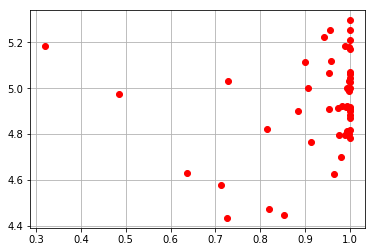

 Iteration 17

/Users/SerG1oAC/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
/Users/SerG1oAC/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in double_scalars


 Iteration 25

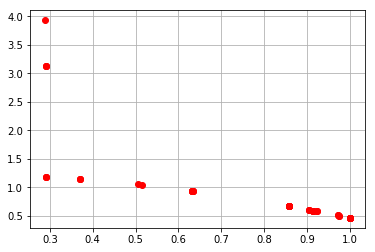

 Iteration 50

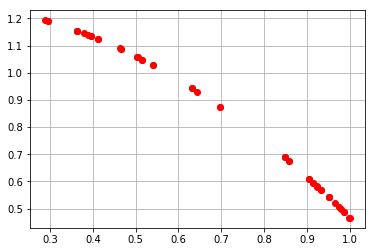

 Iteration 75

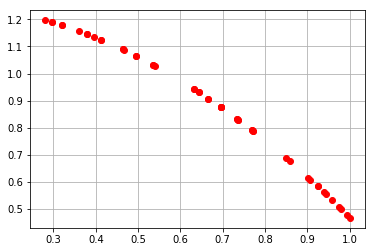

 Iteration 100

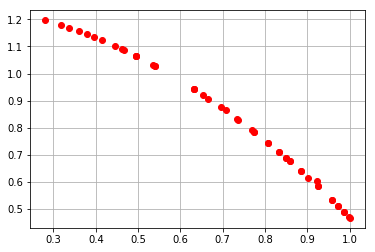

 Iteration 124

In [28]:
N = 50
minVal = 0
maxVal = 1
codeLen = 16
genQty = 10
d = codeLen * genQty
iterations = 125
matingPercent = 0.7
mutaPercent = 1/d
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []
for t in range(iterations):
    sys.stdout.write("\r Iteration " + str(t))
    sys.stdout.flush()
    # Population fitnes and real values
    fitListF1,fitValF1 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = ZDT6_100_f1)
    fitListF2,fitValF2 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = ZDT6_100_f2)
    
    if t%25 == 0:
        plt.plot(fitListF1, fitListF2, 'ro')
        plt.grid()
        plt.savefig('multiObjZDT6_' + str(t) + '.pdf', format='pdf')
        plt.show()
    
    global_fronRanks,fronRanks,frontLit = frontSetBuilder(fitListF1,fitListF2,Pop)
    shuffle(global_fronRanks)
    selection = ga.tournamentSelection4MultyObjMin(Pop, global_fronRanks)
    children = ga.childenGen4MultyObjMin(Pop, selection, matingPercent, mutaPercent)

    augmentedPop = np.concatenate((Pop, children), axis=0)

    # Population fitnes and real values
    fitListF1,fitValF1 = ga.popfitnes(pop = augmentedPop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = ZDT6_100_f1)
    fitListF2,fitValF2 = ga.popfitnes(pop = augmentedPop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = ZDT6_100_f2)
    global_fronRanks,fronRanks,frontLit = frontSetBuilder(fitListF1,fitListF2,augmentedPop)
    
    newPop = np.zeros(Pop.shape).astype(np.uint8)
    popIndex = 0
    for i in range(len(fronRanks)):
        orderedFront = sorted(fronRanks[i], key=lambda k: k['rank'], reverse=True) 
        for j in range(len(orderedFront)):
            newPop[popIndex] = orderedFront[j]['indiv']
            popIndex = popIndex + 1
            if popIndex == Pop.shape[0]:
                break
        if popIndex == Pop.shape[0]:
                break
    
    Pop = np.copy(newPop)
    
    
# Population fitnes and real values
fitListF1,fitValF1 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = ZDT6_100_f1)
fitListF2,fitValF2 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = ZDT6_100_f2)

global_fronRanks,fronRanks,frontLit = frontSetBuilder(fitListF1,fitListF2,Pop)

# SPEA 2

 Iteration 0

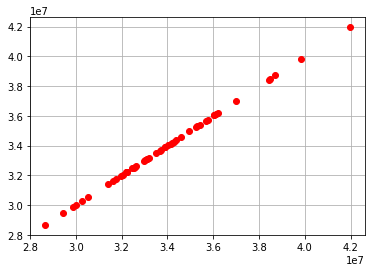

 Iteration 3000

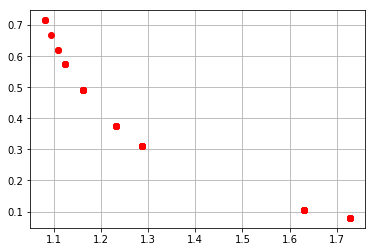

 Iteration 6000

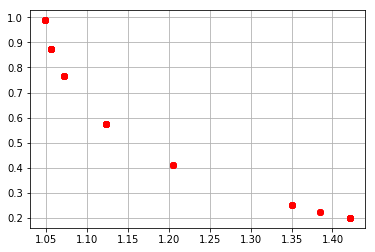

 Iteration 9000

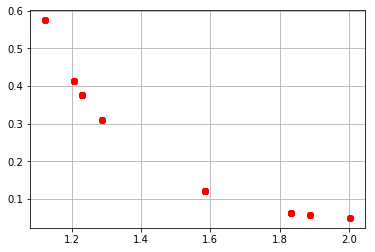

 Iteration 12000

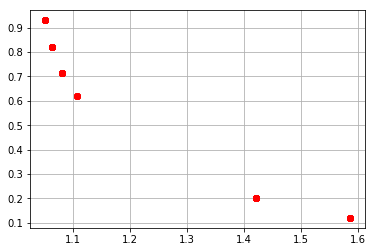

 Iteration 12999

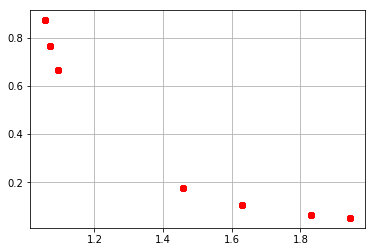

24.183774490860564


In [47]:
N = 50
minVal = -1000
maxVal = 1000
codeLen = 16
genQty = 100
d = codeLen * genQty
iterations = 13000
matingPercent = 0.7
mutaPercent = 1/d
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []
Iterations = []
for t in range(iterations):
    sys.stdout.write("\r Iteration " + str(t))
    sys.stdout.flush()
    # Population fitnes and real values
    fitListF1,fitValF1 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = SPH1_100_f1)
    fitListF2,fitValF2 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = SPH1_100_f2)
    Rawfitness = ga.speaIIRawfitness4AllMinTwoFunctions(fitListF1,fitListF2)
    Distance,D = ga.speaIIDistance4AllMinTwoFunctions(fitListF1,fitListF2)
    F = Rawfitness + D
    
    
    if t%3000 == 0:
        plt.plot(fitListF1, fitListF2, 'ro')
        plt.grid()
        plt.savefig('multiObjSPEA2_SPH2_' + str(t) + '.pdf', format='pdf')
        plt.show()
        
        
    pselect = ga.tournamentSelection(Pop, F, int(N/2))
    children = ga.childenGen4MultyObjMin(Pop, pselect, matingPercent, mutaPercent)
    augmentedPop = np.concatenate((Pop, children), axis=0)
    
    
    fitListF1,fitValF1 = ga.popfitnes(pop = augmentedPop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = SPH1_100_f1)
    fitListF2,fitValF2 = ga.popfitnes(pop = augmentedPop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = SPH1_100_f2)
    Rawfitness = ga.speaIIRawfitness4AllMinTwoFunctions(fitListF1,fitListF2)
    Distance,D = ga.speaIIDistance4AllMinTwoFunctions(fitListF1,fitListF2)
    Ft = Rawfitness + D
    
    fsort = np.argsort(Ft)
    sortAugmentedPop = augmentedPop[fsort]
    sortWholePop = sortAugmentedPop[:N]
    
    flessThan1 = np.where(Ft < 1)
    
    if len(flessThan1) == N:
        Pop = augmentedPop[flessThan1]
        print("break")
        break
        
    if len(flessThan1) < N:
        Pop = sortAugmentedPop[:N]
        
    if len(flessThan1) > N:
        outFlaf = 1
        while outFlaf == 1:
            toReducePop = augmentedPop[flessThan1]
            fitListF1,fitValF1 = ga.popfitnes(pop = toReducePop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = SPH1_100_f1)
            fitListF2,fitValF2 = ga.popfitnes(pop = toReducePop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = SPH1_100_f2)
            Rawfitness = ga.speaIIRawfitness4AllMinTwoFunctions(fitListF1,fitListF2)
            Distance,D = ga.speaIIDistance4AllMinTwoFunctions(fitListF1,fitListF2)
            Frdc = Rawfitness + D
            fsort = np.argsort(Frdc)
            sortToReducePopPop = toReducePop[fsort]
            toReducePop = np.copy(sortToReducePopPop[:-1])
            if toReducePop.shape[0] == N:
                outFlaf = 0
                Pop = np.copy(toReducePop)
                
    

fitListF1,fitValF1 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = SPH1_100_f1)
fitListF2,fitValF2 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = SPH1_100_f2)
Rawfitness = ga.speaIIRawfitness4AllMinTwoFunctions(fitListF1,fitListF2)
Distance,D = ga.speaIIDistance4AllMinTwoFunctions(fitListF1,fitListF2)
F = Rawfitness + D
plt.plot(fitListF1, fitListF2, 'ro')
plt.grid()
plt.show()    
print(np.sum(F))

 Iteration 0

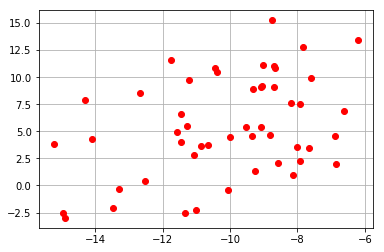

 Iteration 400

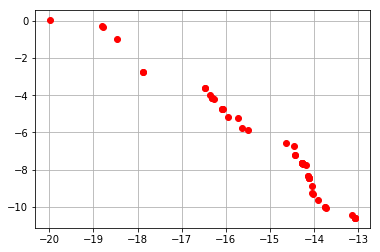

 Iteration 800

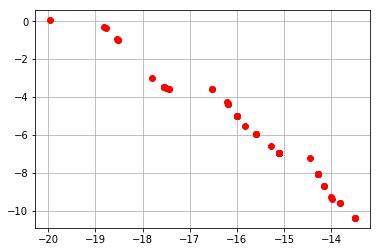

 Iteration 1200

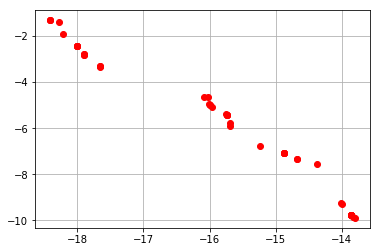

 Iteration 1600

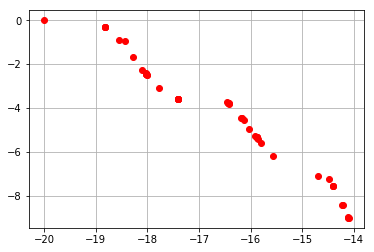

 Iteration 1999

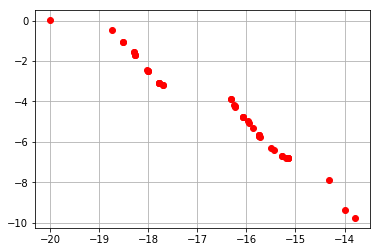

19.043406256875116


In [43]:
N = 50
minVal = -5
maxVal = 5
codeLen = 16
genQty = 3

d = codeLen * genQty
iterations = 2000
matingPercent = 0.7
mutaPercent = 1/d
# Initial population
Pop = ga.pgenerator(N=N,d =d)

# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))

Iterations = []
for t in range(iterations):
    sys.stdout.write("\r Iteration " + str(t))
    sys.stdout.flush()
    # Population fitnes and real values
    fitListF1,fitValF1 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = KUR_100_f1)
    fitListF2,fitValF2 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = KUR_100_f2)
    Rawfitness = ga.speaIIRawfitness4AllMinTwoFunctions(fitListF1,fitListF2)
    Distance,D = ga.speaIIDistance4AllMinTwoFunctions(fitListF1,fitListF2)
    F = Rawfitness + D
    
    
    if t%400 == 0:
        plt.plot(fitListF1, fitListF2, 'ro')
        plt.grid()
        plt.savefig('multiObjSPEA2_KUR_' + str(t) + '.pdf', format='pdf')
        plt.show()
        
        
    pselect = ga.tournamentSelection(Pop, F, int(N/2))
    children = ga.childenGen4MultyObjMin(Pop, pselect, matingPercent, mutaPercent)
    augmentedPop = np.concatenate((Pop, children), axis=0)
    
    
    fitListF1,fitValF1 = ga.popfitnes(pop = augmentedPop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = KUR_100_f1)
    fitListF2,fitValF2 = ga.popfitnes(pop = augmentedPop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = KUR_100_f2)
    Rawfitness = ga.speaIIRawfitness4AllMinTwoFunctions(fitListF1,fitListF2)
    Distance,D = ga.speaIIDistance4AllMinTwoFunctions(fitListF1,fitListF2)
    Ft = Rawfitness + D
    
    fsort = np.argsort(Ft)
    sortAugmentedPop = augmentedPop[fsort]
    sortWholePop = sortAugmentedPop[:N]
    
    flessThan1 = np.where(Ft < 1)
    
    if len(flessThan1) == N:
        Pop = augmentedPop[flessThan1]
        print("break")
        break
        
    if len(flessThan1) < N:
        Pop = sortAugmentedPop[:N]
        
    if len(flessThan1) > N:
        outFlaf = 1
        while outFlaf == 1:
            toReducePop = augmentedPop[flessThan1]
            fitListF1,fitValF1 = ga.popfitnes(pop = toReducePop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = KUR_100_f1)
            fitListF2,fitValF2 = ga.popfitnes(pop = toReducePop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = KUR_100_f2)
            Rawfitness = ga.speaIIRawfitness4AllMinTwoFunctions(fitListF1,fitListF2)
            Distance,D = ga.speaIIDistance4AllMinTwoFunctions(fitListF1,fitListF2)
            Frdc = Rawfitness + D
            fsort = np.argsort(Frdc)
            sortToReducePopPop = toReducePop[fsort]
            toReducePop = np.copy(sortToReducePopPop[:-1])
            if toReducePop.shape[0] == N:
                outFlaf = 0
                Pop = np.copy(toReducePop)
                
    

fitListF1,fitValF1 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = KUR_100_f1)
fitListF2,fitValF2 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = KUR_100_f2)
Rawfitness = ga.speaIIRawfitness4AllMinTwoFunctions(fitListF1,fitListF2)
Distance,D = ga.speaIIDistance4AllMinTwoFunctions(fitListF1,fitListF2)
F = Rawfitness + D
plt.plot(fitListF1, fitListF2, 'ro')
plt.grid()
plt.show()    
print(np.sum(F))

 Iteration 0

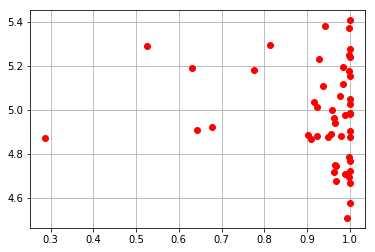

 Iteration 400

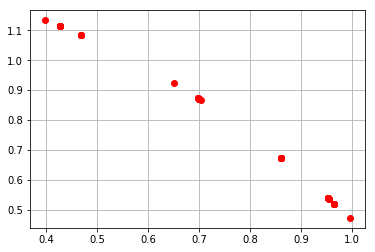

 Iteration 800

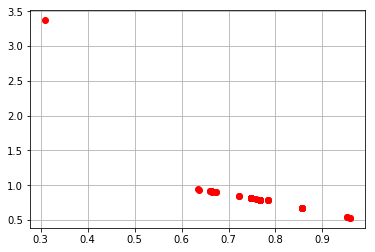

 Iteration 1200

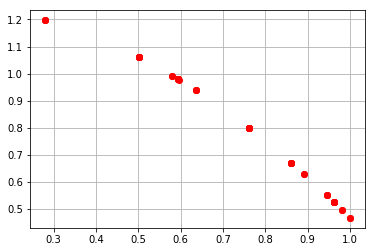

 Iteration 1600

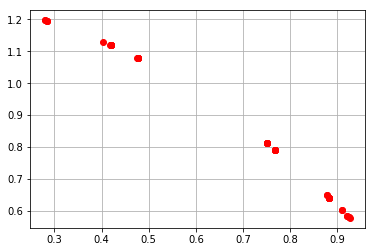

 Iteration 1999

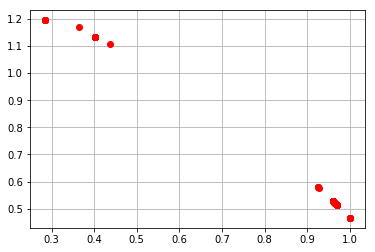

24.67083058721689


In [44]:
N = 50
minVal = 0
maxVal = 1
codeLen = 16
genQty = 10
d = codeLen * genQty
iterations = 2000
matingPercent = 0.7
mutaPercent = 1/d
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))

Iterations = []
for t in range(iterations):
    sys.stdout.write("\r Iteration " + str(t))
    sys.stdout.flush()
    # Population fitnes and real values
    fitListF1,fitValF1 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = ZDT6_100_f1)
    fitListF2,fitValF2 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = ZDT6_100_f2)
    Rawfitness = ga.speaIIRawfitness4AllMinTwoFunctions(fitListF1,fitListF2)
    Distance,D = ga.speaIIDistance4AllMinTwoFunctions(fitListF1,fitListF2)
    F = Rawfitness + D
    
    
    if t%400 == 0:
        plt.plot(fitListF1, fitListF2, 'ro')
        plt.grid()
        plt.savefig('multiObjSPEA2_ZDT6_' + str(t) + '.pdf', format='pdf')
        plt.show()
        
        
    pselect = ga.tournamentSelection(Pop, F, int(N/2))
    children = ga.childenGen4MultyObjMin(Pop, pselect, matingPercent, mutaPercent)
    augmentedPop = np.concatenate((Pop, children), axis=0)
    
    
    fitListF1,fitValF1 = ga.popfitnes(pop = augmentedPop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = ZDT6_100_f1)
    fitListF2,fitValF2 = ga.popfitnes(pop = augmentedPop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = ZDT6_100_f2)
    Rawfitness = ga.speaIIRawfitness4AllMinTwoFunctions(fitListF1,fitListF2)
    Distance,D = ga.speaIIDistance4AllMinTwoFunctions(fitListF1,fitListF2)
    Ft = Rawfitness + D
    
    fsort = np.argsort(Ft)
    sortAugmentedPop = augmentedPop[fsort]
    sortWholePop = sortAugmentedPop[:N]
    
    flessThan1 = np.where(Ft < 1)
    
    if len(flessThan1) == N:
        Pop = augmentedPop[flessThan1]
        print("break")
        break
        
    if len(flessThan1) < N:
        Pop = sortAugmentedPop[:N]
        
    if len(flessThan1) > N:
        outFlaf = 1
        while outFlaf == 1:
            toReducePop = augmentedPop[flessThan1]
            fitListF1,fitValF1 = ga.popfitnes(pop = toReducePop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = ZDT6_100_f1)
            fitListF2,fitValF2 = ga.popfitnes(pop = toReducePop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = ZDT6_100_f2)
            Rawfitness = ga.speaIIRawfitness4AllMinTwoFunctions(fitListF1,fitListF2)
            Distance,D = ga.speaIIDistance4AllMinTwoFunctions(fitListF1,fitListF2)
            Frdc = Rawfitness + D
            fsort = np.argsort(Frdc)
            sortToReducePopPop = toReducePop[fsort]
            toReducePop = np.copy(sortToReducePopPop[:-1])
            if toReducePop.shape[0] == N:
                outFlaf = 0
                Pop = np.copy(toReducePop)
                
    

fitListF1,fitValF1 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = ZDT6_100_f1)
fitListF2,fitValF2 = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = ZDT6_100_f2)
Rawfitness = ga.speaIIRawfitness4AllMinTwoFunctions(fitListF1,fitListF2)
Distance,D = ga.speaIIDistance4AllMinTwoFunctions(fitListF1,fitListF2)
F = Rawfitness + D
plt.plot(fitListF1, fitListF2, 'ro')
plt.grid()
plt.show()    
print(np.sum(F))
    